# Heart Health Prediction

#### Importing Data form heart.csv

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
df=pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


# Data Cleansing

#### Listing Null Values form data

In [20]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


###### Droping Null values because Null values are very less as compared to data size

In [21]:
df=df.dropna()

# Data Visualization

##### Give the info of Data Type

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


###### Describing the wohle Data

In [23]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


##### Pandas Profiling Provide the Report of data set including Corelation

In [24]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
#!pip install ydata-profiling
#import ydata_profiling
#profile = ydata_profiling.ProfileReport(df)
#profile

In [31]:
d=df['Target'].value_counts()
print(d)

Target
0    163
1    138
Name: count, dtype: int64


##### Heart Diseases Ratio in Dataset
###### Blue Graph indicate no heart desease and Orange Graph show Heart desease

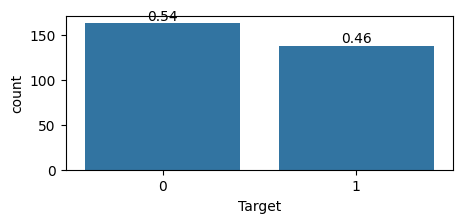

In [32]:
import seaborn as sns
def plotTarget():
    sns.countplot(x='Target', data=df, ax=ax)
    for i, p in enumerate(ax.patches):
        count=df['Target'].value_counts().values[i]
        x=p.get_x()+ p.get_width() /2.
        y=p.get_height() + 3
        label='{:1.2f}'.format(count / float(df.shape[0]))
        ax.text(x, y,label, ha='center')

fig_target,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
plotTarget()

##### Checking the corelation of data

##### Select Age as most dependent data on label
###### Disease Probability Bar Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


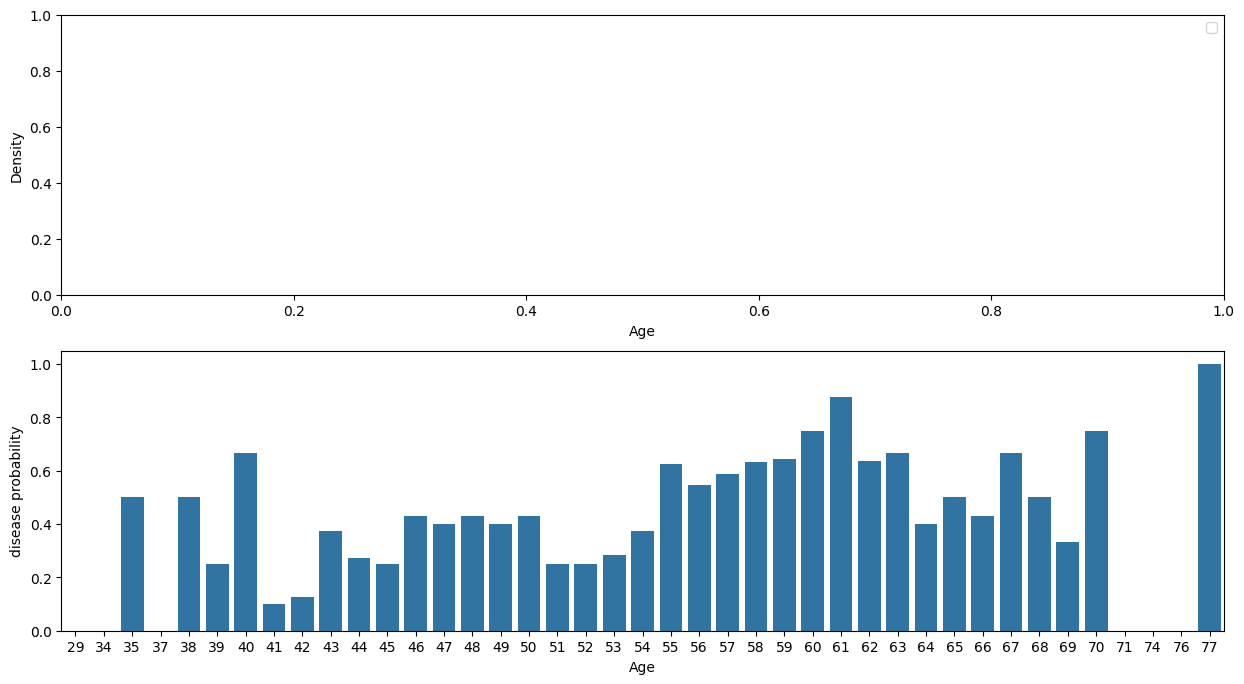

<Figure size 300x300 with 0 Axes>

In [34]:
import seaborn as sns

def plotAge():
    facet_grid = sns.FacetGrid(df, hue='Target')
    facet_grid.map(sns.kdeplot, "Age", shade=True, ax=axes[0])

    # Move legend creation after the plot is drawn
    axes[0].legend(labels=['Disease false', 'Disease true'])

    axes[0].set(xlabel='Age', ylabel='Density')

    avg = df[["Age", "Target"]].groupby(['Age'], as_index=False).mean()
    sns.barplot(x='Age', y='Target', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='disease probability')

    plt.clf()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge()

###### Checking For Categorical Data

In [35]:
x=df['ChestPain']
x.value_counts()

,count
ChestPain,
asymptomatic,143
nonanginal,85
nontypical,50
typical,23


In [36]:
x=df['Thal']
x.value_counts()

,count
Thal,
normal,166
reversable,117
fixed,18


##### Ploting Function For Categorical Data " Chest Pain" && "Thalassemia"
##### Ploting Function For Continoius Data

In [41]:
import seaborn as sns
category=[('ChestPain', ['typical','nontypical','nonanginal','asymptomatic']),('Thal',['fixed','normal','reversable',])]
continuous = [('Age', 'Age in year'),
              ('Sex','1 for Male 0 for Female'),
              ('RestBP','BP in Rest State'),
              ('Fbs','Fasting blood glucose'),
              ('RestECG','ECG at rest'),
              ('Chol', 'serum cholestoral in mg/d'),
              ('MaxHR','Max Heart Rate'),
              ('ExAng','Exchange Rate'),
              ('Slope','Slope of Curve'),
              ('Oldpeak', 'ST depression by exercise relative to rest'),
              ('Ca', '# major vessels: (0-3) colored by flourosopy')]


def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='Target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'Target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='Target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='Target', y=attribute, data=df, ax=axes[ax_index][1])


def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(category)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [39]:
import seaborn as sns

# ... (rest of the code) ...

def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='Target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'Target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='Target', hue=attribute, data=avg, ax=axes[ax_index][2])

    # Check if legend exists before accessing its texts
    legend1 = axes[ax_index][1].get_legend()
    if legend1:
        for t, l in zip(legend1.texts, labels):
            t.set_text(l)

    legend2 = axes[ax_index][2].get_legend()
    if legend2:
        for t, l in zip(legend2.texts, labels):
            t.set_text(l)

# ... (rest of the code) ...

##### Categorical Plot

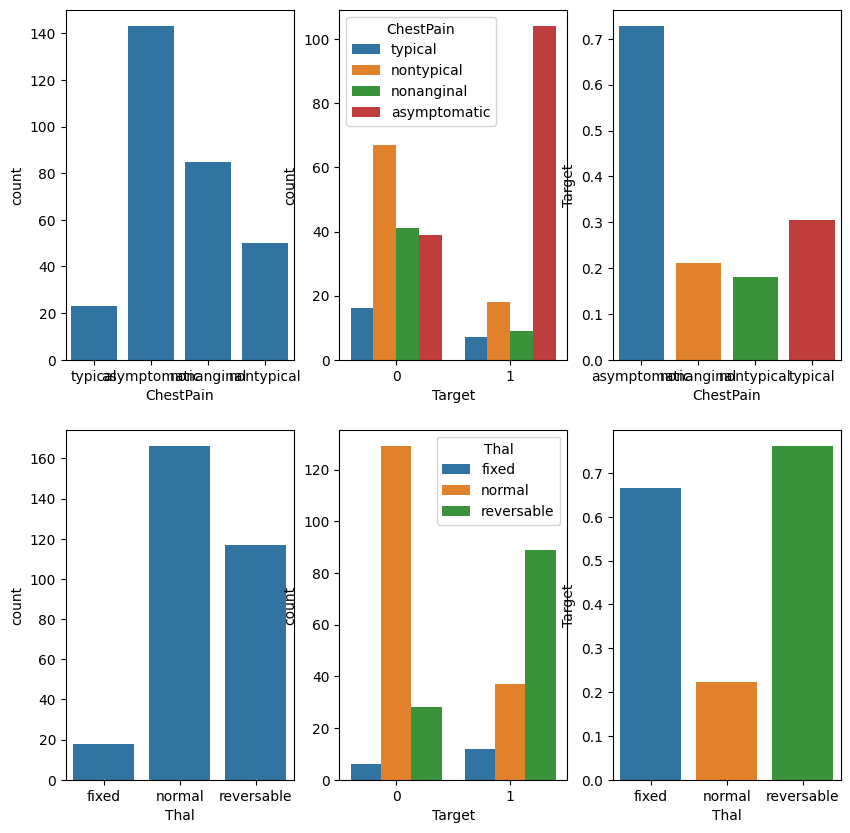

In [40]:
fig_categorial,axes=plt.subplots(nrows=len(category), ncols=3, figsize=(10, 10))
plotGrid(isCategorial=True)

##### Continuous Plot

<ipython-input-41-4a0b182287d7>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[[attribute]], ax=axes[ax_index][0])
<ipython-input-41-4a0b182287d7>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[[attribute]], ax=axes[ax_index][0])
<ipython-input-41-4a0b182287d7>:29: UserWarning: 

`di

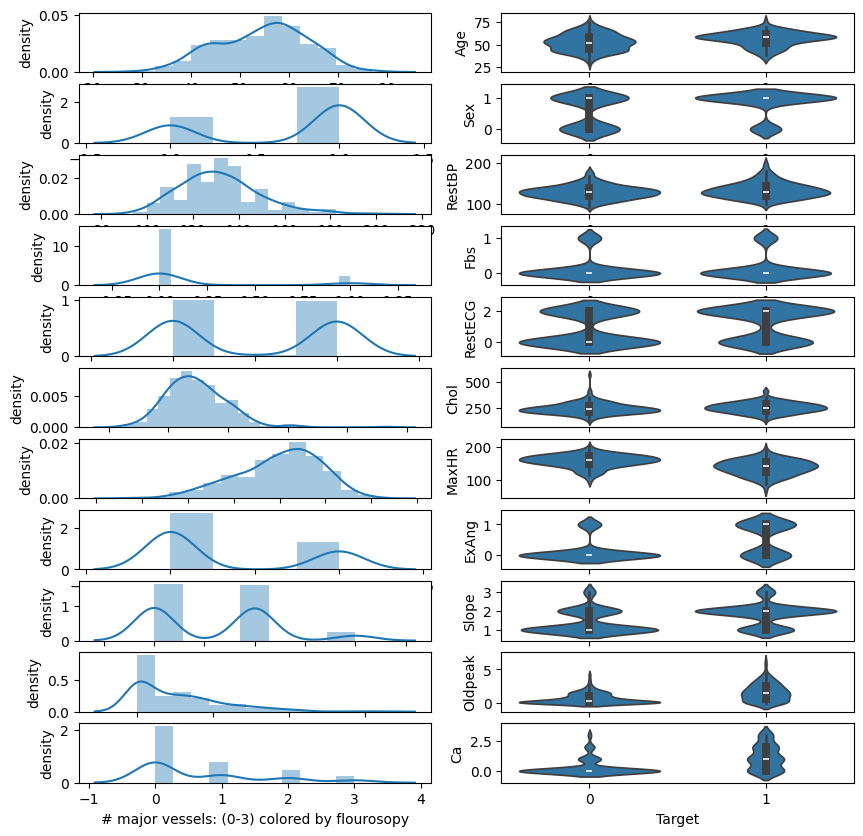

In [42]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(10,10))
plotGrid(isCategorial=False)

##### Creating Dummy

In [43]:
#dummy for chest Pain
chestpain_dummy = pd.get_dummies(df.loc[:,'ChestPain'])
chestpain_dummy.rename(columns={1: 'Typical', 2: 'Asymptomatic',3: 'Nonanginal', 4: 'Nontypical'}, inplace=True)
#dummy for RestECG
restecg_dummy = pd.get_dummies(df.loc[:,'RestECG'])
restecg_dummy.rename(columns={0: 'Normal_restECG', 1: 'Wave_abnormal_restECG',2:'Ventricular_ht_restECG'},inplace=True)
#dummy for Slope
slope_dummy = pd.get_dummies(df['Slope'])
slope_dummy.rename(columns={1: 'Slope_upsloping', 2:'Slope_flat',3: 'Slope_downsloping'},inplace=True)
#dummy for Thal
thal_dummy = pd.get_dummies(df['Thal'])
thal_dummy.rename(columns={3: 'Thal_Normal', 6: 'Thal_fixed',7: 'Thal_reversible'}, inplace=True)
#concatination in data frame
df = pd.concat([df,chestpain_dummy, restecg_dummy, slope_dummy, thal_dummy], axis=1)
#droping Column because their dummies are created
df.drop(['ChestPain','RestECG', 'Slope', 'Thal'], axis=1, inplace=True)

##### Checking the No object will left

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     301 non-null    int64  
 1   Sex                     301 non-null    int64  
 2   RestBP                  301 non-null    int64  
 3   Chol                    301 non-null    int64  
 4   Fbs                     301 non-null    int64  
 5   MaxHR                   301 non-null    int64  
 6   ExAng                   301 non-null    int64  
 7   Oldpeak                 301 non-null    float64
 8   Ca                      301 non-null    int64  
 9   Target                  301 non-null    int64  
 10  asymptomatic            301 non-null    bool   
 11  nonanginal              301 non-null    bool   
 12  nontypical              301 non-null    bool   
 13  typical                 301 non-null    bool   
 14  Normal_restECG          301 non-null    bool   

##### Checking dataset

In [45]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,Target,...,typical,Normal_restECG,Wave_abnormal_restECG,Ventricular_ht_restECG,Slope_upsloping,Slope_flat,Slope_downsloping,fixed,normal,reversable
0,63,1,145,233,1,150,0,2.3,0,0,...,True,False,False,True,False,False,True,True,False,False
1,67,1,160,286,0,108,1,1.5,3,1,...,False,False,False,True,False,True,False,False,True,False
2,67,1,120,229,0,129,1,2.6,2,1,...,False,False,False,True,False,True,False,False,False,True
3,37,1,130,250,0,187,0,3.5,0,0,...,False,True,False,False,False,False,True,False,True,False
4,41,0,130,204,0,172,0,1.4,0,0,...,False,False,False,True,True,False,False,False,True,False


##### Selecting label means selected Column to predict in df_X and input column in df_y

In [46]:
df_X= df.loc[:, df.columns != 'Target']
df_y= df.loc[:, df.columns == 'Target']

### Best Model for Dataset is Linear Regression